In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r'C:\Users\Andrei.Baidurov\testTRAV\Data\TDStest.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (1998, 2)

First few rows:
               Hotel Name    Hotel ID
0        Bloomtalya Hotel  60347833.0
1  Saint-Petersburg Hotel   1070601.0
2  Saint-Petersburg Hotel   1070601.0
3   Dvorak Spa & Wellness   2974863.0
4      Elite Byblos Hotel   1311226.0

Column names:
['Hotel Name', 'Hotel ID']


Top 10 most repeated hotels:
25hours Hotel One Central: 92 times (IDs: [4985083.])
Hilton Quebec: 34 times (IDs: [1023083.])
Grand Mercure Dubai City: 33 times (IDs: [38970443.])
voco Dubai: 33 times (IDs: [2225317.])
ibis Styles Dubai Airport Hotel: 31 times (IDs: [21724521.])
Swissôtel Al Murooj Dubai: 26 times (IDs: [90001468.])
Millennium Plaza Downtown Hotel: 25 times (IDs: [1578975.])
Montreal Barsha Hotel: 25 times (IDs: [1519517.])
Hospedium Princess Hotel Panamá: 23 times (IDs: [2060343.])
LaGuardia Plaza Hotel: 17 times (IDs: [2547229.])


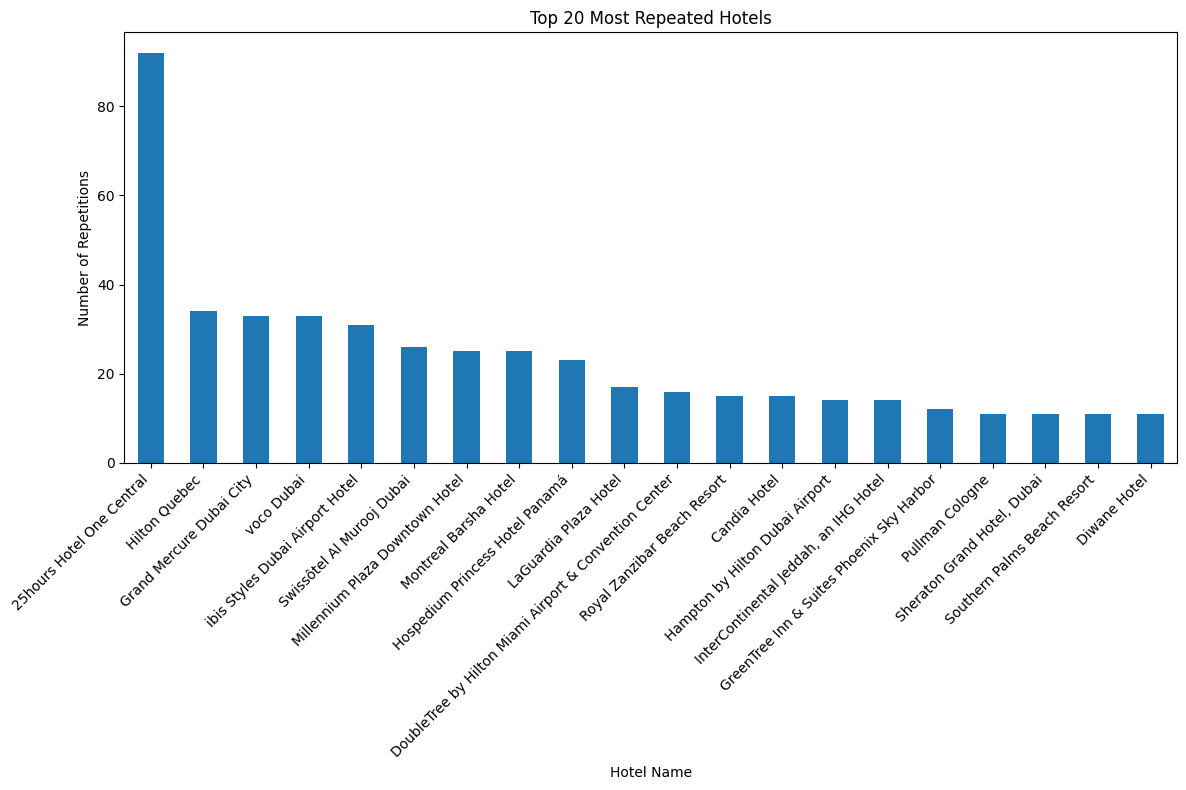


Detailed hotel repetition summary (top 10):
                                 Total_Count  Unique_IDs       All_IDs
Hotel Name                                                            
25hours Hotel One Central                 92           1   [4985083.0]
Hilton Quebec                             34           1   [1023083.0]
Grand Mercure Dubai City                  33           1  [38970443.0]
voco Dubai                                33           1   [2225317.0]
ibis Styles Dubai Airport Hotel           31           1  [21724521.0]
Swissôtel Al Murooj Dubai                 26           1  [90001468.0]
Millennium Plaza Downtown Hotel           25           1   [1578975.0]
Montreal Barsha Hotel                     25           1   [1519517.0]
Hospedium Princess Hotel Panamá           23           1   [2060343.0]
LaGuardia Plaza Hotel                     17           1   [2547229.0]


In [3]:
import matplotlib.pyplot as plt

# Count how many times each hotel appears
hotel_counts = df['Hotel Name'].value_counts()

# Display the top repeated hotels with their IDs
print("Top 10 most repeated hotels:")
for hotel_name in hotel_counts.head(10).index:
    count = hotel_counts[hotel_name]
    hotel_ids = df[df['Hotel Name'] == hotel_name]['Hotel ID'].unique()
    print(f"{hotel_name}: {count} times (IDs: {hotel_ids})")

# Plot the hotel repetition counts
plt.figure(figsize=(12, 8))
hotel_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Repeated Hotels')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Repetitions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a detailed dataframe showing hotel repetitions with IDs
hotel_summary = df.groupby('Hotel Name').agg({
    'Hotel ID': ['count', 'nunique', lambda x: list(x.unique())]
}).round(2)
hotel_summary.columns = ['Total_Count', 'Unique_IDs', 'All_IDs']
hotel_summary = hotel_summary.sort_values('Total_Count', ascending=False)

print("\nDetailed hotel repetition summary (top 10):")
print(hotel_summary.head(10))